# Identifiation system basing on behavioral biometrics: typing errors - dataset analysis

## Configuration
### Load dependencies

In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from classifiers import build_tuned_nn, build_tuned_rfc, param_grid
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from tensorflow import config
from cv import run_cv_neural_network
import pandas as pd


2023-08-17 19:01:57.699529: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 19:01:57.794779: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-17 19:01:57.795935: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-17 19:01:59.331927: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  0
[]
2023-08-17 19:02:01,226 — matplotlib — DEBUG — matplotlib data path: /home/bartek/PycharmProjects/Biometric_system_based_on_behavioral_biometrics_typing_errors_in_English/venv/lib/python3.11/site-packages/matplotlib/mpl-data
2023-08-17 19:02:01,236 — matplotlib — DEBUG — CONFIGDIR=/home/bartek/.config/matplotlib
2023-08-17 19:02:01,239 — matplotlib — DEBUG — interactive is False
2023-08-17 19:02:01,240 — matplotlib — DEBUG — platform is linux
2023-08-17 19:02:01,340 — matplotlib — DEBUG — CACHEDIR=/home/bartek/.cache/matplotlib
2023-08-17 19:02:01,345 — matplotlib.font_manager — DEBUG — Using fontManager instance from /home/bartek/.cache/matplotlib/fontlist-v330.json


#### Configure GPUs

In [2]:
gpus = config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    config.experimental.set_memory_growth(gpu, True)
    print(gpu)

## Define classifiers

In [3]:
CLASSIFIERS = [
    (RandomForestClassifier(), param_grid['Random Forest'], 'Random Forest'),

    (KNeighborsClassifier(), param_grid['K-Nearest Neighbors'], 'K-Nearest Neighbors'),
    (SVC(probability=True), param_grid['SVC'], 'SVC'),

        (GradientBoostingClassifier(),
         param_grid['Gradient Boosting'],
         'Gradient Boosting'),

        (MLPClassifier(), param_grid['MLP Classifier'], 'MLP Classifier'),
]

## Load dataset

In [18]:
from create_model import create_dataset
from sklearn.preprocessing import Normalizer
X_train, y_train, X_test, y_test = create_dataset(test_ratio=0.5, if_separate_words=True, scaler=Normalizer()) 

2023-08-17 22:57:28,880 — logger — DEBUG — ----- load_data: start -----
2023-08-17 22:57:28,881 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:57:28,939 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.06 seconds)-----
2023-08-17 22:57:28,940 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:57:29,115 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.18 seconds)-----
2023-08-17 22:57:29,116 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:57:29,192 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.08 seconds)-----
2023-08-17 22:57:29,193 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:57:29,249 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.06 seconds)-----
2023-08-17 22:57:29,250 — logger — DEBUG — ----- get_misspelled_words_df_from_json: 

In [19]:
pd.DataFrame(y_test).value_counts()

0    35000
1    35000
2    35000
3    35000
4    35000
5    35000
6    35000
7    35000
Name: count, dtype: int64

2023-08-17 19:35:01,875 — matplotlib.pyplot — DEBUG — Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-17 19:35:01,877 — matplotlib.pyplot — DEBUG — Loaded backend module://matplotlib_inline.backend_inline version unknown.
2023-08-17 19:35:01,880 — matplotlib.font_manager — DEBUG — findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2023-08-17 19:35:01,881 — matplotlib.font_manager — DEBUG — findfont: score(FontEntry(fname='/home/bartek/PycharmProjects/Biometric_system_based_on_behavioral_biometrics_typing_errors_in_English/venv/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneral.ttf', name='STIXGeneral', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2023-08-17 19:35:01,882 — matplotlib.font_manager — DEBUG — findfont: score(FontEntry(fname='/home/bartek/PycharmProjects/Biometric_system_based_on_behavioral_biometrics_typing_errors_in_English/ven

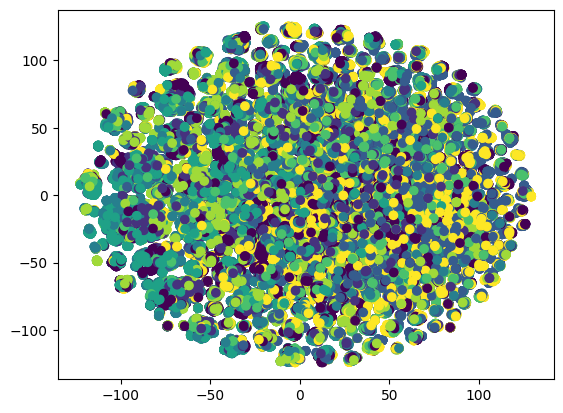

In [12]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

data_tsne = TSNE().fit_transform(X_train)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_train)
plt.show()

In [59]:
from sklearn.decomposition import PCA
import numpy as np

def determine_optimal_features(dataset, thresh = 0.95):
    # Apply PCA
    pca = PCA()
    pca.fit(dataset)
    
    # Calculate cumulative explained variance
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    
    # Get number of components needed to explain a certain amount of variance, e.g., 95%  
    return np.argmax(cumulative_variance > thresh) + 1

In [60]:
results = []
possible_values = list(range(2,11))
num_of_features = list(range(2,11))
NUMBER_OF_FEATURES=15
# Assume possible_values is a list of values you want to iterate over for the parameters
for AMOUNT_OF_N_GRAMS_PERS_USER in possible_values:
    # for NUMBER_OF_FEATURES in possible_values:
        X_train, y_train, X_test, y_test = create_dataset(test_ratio=0.5, if_separate_words=True, scaler=Normalizer()) 
        
        n_components_needed = determine_optimal_features(X_train)
        
        results.append({
            'AMOUNT_OF_N_GRAMS_PERS_USER': AMOUNT_OF_N_GRAMS_PERS_USER,
            'NUMBER_OF_FEATURES': NUMBER_OF_FEATURES,
            'n_components_needed': n_components_needed
        })

2023-08-18 00:12:27,520 — logger — DEBUG — ----- load_data: start -----
2023-08-18 00:12:27,522 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-18 00:12:27,574 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.05 seconds)-----
2023-08-18 00:12:27,575 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-18 00:12:27,729 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.15 seconds)-----
2023-08-18 00:12:27,729 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-18 00:12:28,124 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.39 seconds)-----
2023-08-18 00:12:28,125 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-18 00:12:28,192 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.07 seconds)-----
2023-08-18 00:12:28,192 — logger — DEBUG — ----- get_misspelled_words_df_from_json: 

In [61]:
pd.DataFrame(results)

,AMOUNT_OF_N_GRAMS_PERS_USER,NUMBER_OF_FEATURES,n_components_needed
0,2,15,10
1,3,15,10
2,4,15,10
3,5,15,10
4,6,15,10
5,7,15,10
6,8,15,10
7,9,15,10
8,10,15,10


2023-08-17 22:39:45,600 — matplotlib.colorbar — DEBUG — locator: <matplotlib.ticker.AutoLocator object at 0x7fe41dde0990>


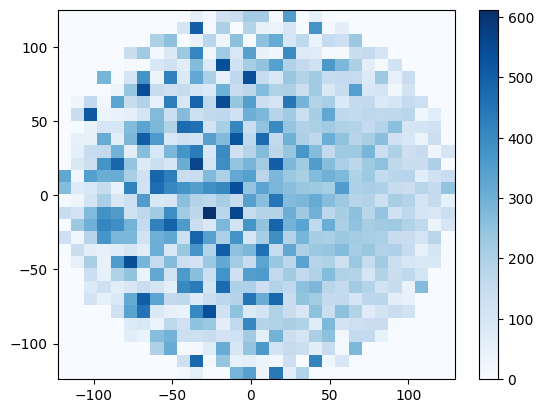

In [13]:
plt.hist2d(data_tsne[:, 0], data_tsne[:, 1], bins=30, cmap='Blues')
plt.colorbar()
plt.show()

In [25]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # create a 3D axis object
# ax.scatter(data_tsne[:, 0], data_tsne[:, 1], y_train,  c=y_train, marker='.')  # scatter plot
# plt.show()

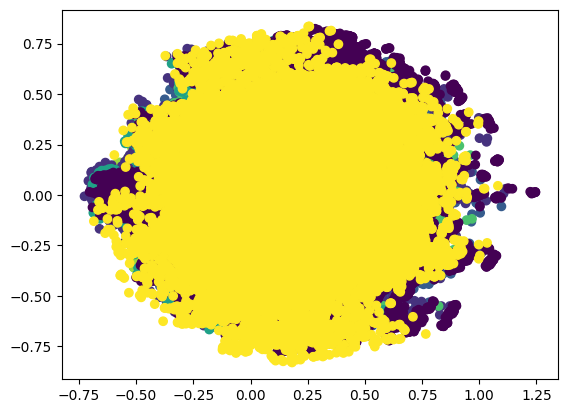

In [27]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_data = PCA().fit_transform(X_train)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_train)
plt.show()

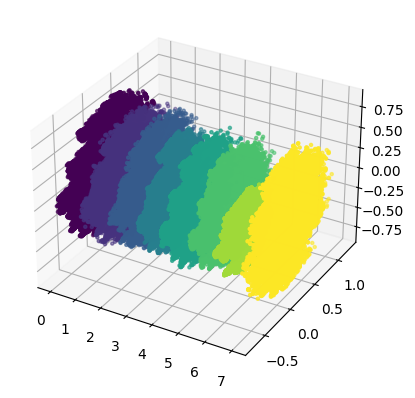

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # create a 3D axis object
ax.scatter(y_train, pca_data[:, 0], pca_data[:, 1], c=y_train,marker='.')  # scatter plot
plt.show()

In [44]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)

PCA(n_components=50)

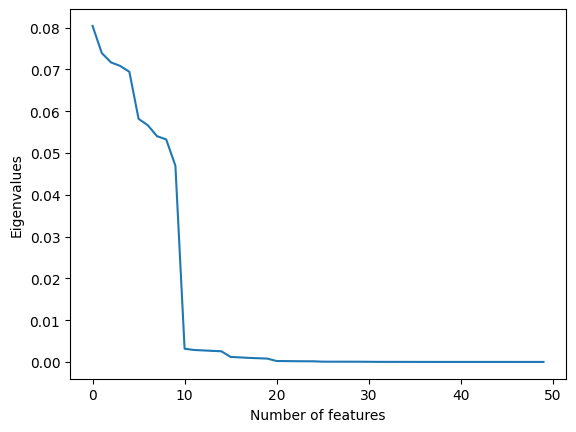

In [45]:
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.plot(pca.explained_variance_)

In [52]:
pd.DataFrame(pca.explained_variance_ratio_)

,0
0,1.226736e-01
1,1.127735e-01
2,1.093538e-01
3,1.080669e-01
4,1.059269e-01
5,8.874098e-02
6,8.642044e-02
7,8.242249e-02
8,8.123182e-02
9,7.165324e-02


In [57]:
for idx in np.argsort(np.abs(pca.components_[0]))[::-1]:
    print(f"Feature {idx}, Weight: {pca.components_[0][idx]:.4f}")


Feature 6, Weight: 0.4325
Feature 46, Weight: 0.4016
Feature 44, Weight: -0.3483
Feature 16, Weight: 0.3288
Feature 4, Weight: -0.3091
Feature 24, Weight: -0.3062
Feature 14, Weight: -0.2774
Feature 26, Weight: 0.2651
Feature 34, Weight: -0.2375
Feature 36, Weight: 0.1675
Feature 49, Weight: 0.0183
Feature 18, Weight: 0.0147
Feature 19, Weight: 0.0118
Feature 29, Weight: 0.0118
Feature 39, Weight: 0.0088
Feature 28, Weight: 0.0070
Feature 2, Weight: 0.0060
Feature 45, Weight: 0.0057
Feature 7, Weight: 0.0056
Feature 42, Weight: 0.0051
Feature 47, Weight: 0.0048
Feature 35, Weight: 0.0045
Feature 12, Weight: 0.0043
Feature 17, Weight: 0.0043
Feature 25, Weight: 0.0038
Feature 9, Weight: -0.0037
Feature 27, Weight: 0.0035
Feature 22, Weight: 0.0034
Feature 8, Weight: -0.0031
Feature 43, Weight: 0.0029
Feature 5, Weight: -0.0028
Feature 33, Weight: 0.0025
Feature 37, Weight: 0.0025
Feature 32, Weight: 0.0023
Feature 3, Weight: -0.0020
Feature 38, Weight: 0.0014
Feature 48, Weight: 0.0010


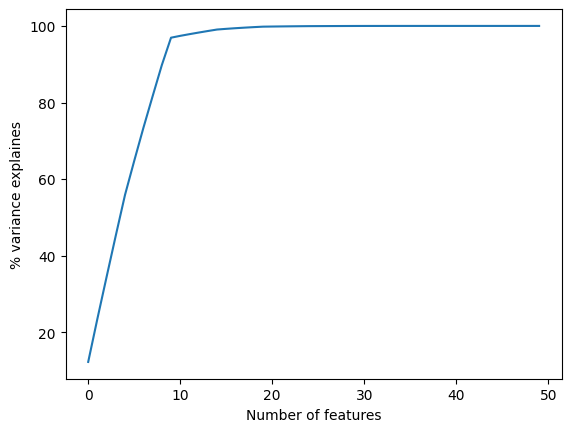

In [48]:
variance = pca.explained_variance_ratio_
var = np.cumsum(pca.explained_variance_ratio_)*100
plt.ylabel('% variance explaines')
plt.xlabel('Number of features')
plt.plot(var)

In [ ]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')  # create a 3D axis object
# ax.scatter(data_tsne[:, 0], data_tsne[:, 1], y_train, c=y_train, marker='.')  # scatter plot
# plt.show()

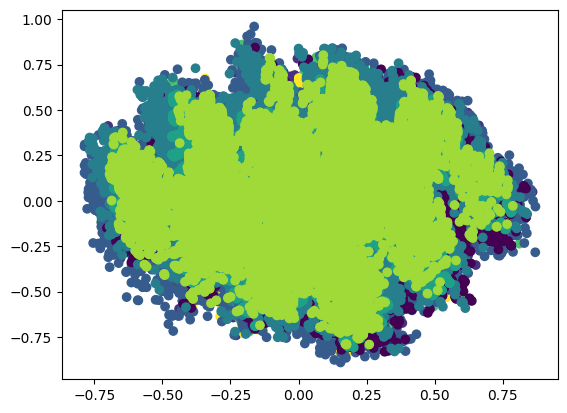

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca_data = PCA().fit_transform(X_test)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=y_test)
plt.show()

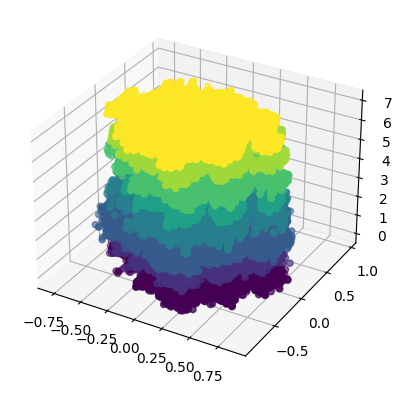

In [51]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # create a 3D axis object
ax.scatter(pca_data[:, 0], pca_data[:, 1], y_test, c=y_test, marker='o')  # scatter plot
plt.show()

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
# X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5)
clf.fit(X_train, y_train)
print(classification_report(y_train, clf.predict(X_train)))
print(classification_report(y_test, clf.predict(X_test)))
# print(classification_report(y_train, clf.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35000
           1       1.00      1.00      1.00     35000
           2       1.00      1.00      1.00     35000
           3       1.00      1.00      1.00     35000
           4       1.00      1.00      1.00     35000
           5       1.00      1.00      1.00     35000
           6       1.00      1.00      1.00     35000
           7       1.00      1.00      1.00     35000

    accuracy                           1.00    280000
   macro avg       1.00      1.00      1.00    280000
weighted avg       1.00      1.00      1.00    280000
              precision    recall  f1-score   support

           0       0.85      0.14      0.24     35000
           1       0.16      0.88      0.28     35000
           2       0.56      0.30      0.39     35000
           3       0.27      0.09      0.13     35000
           4       0.54      0.08      0.14     35000
           5       0.27  

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
X_train, y_train, X_test, y_test = create_dataset(test_ratio=0.01, if_separate_words=True, scaler=Normalizer()) 
X, X_test, y, y_test = train_test_split(X_train, y_train, test_size=0.5)
clf.fit(X_train, y_train)
run_cv_neural_network(X, y, X_test, y_train)
# print(classification_report(y_train, clf.predict(X_train)))

2023-08-17 22:50:11,904 — logger — DEBUG — ----- load_data: start -----
2023-08-17 22:50:11,906 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:50:11,970 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.06 seconds)-----
2023-08-17 22:50:11,971 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:50:12,177 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.20 seconds)-----
2023-08-17 22:50:12,178 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:50:12,310 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.13 seconds)-----
2023-08-17 22:50:12,311 — logger — DEBUG — ----- get_misspelled_words_df_from_json: start -----
2023-08-17 22:50:12,410 — logger — DEBUG — ----- get_misspelled_words_df_from_json: finished in 0.10 seconds)-----
2023-08-17 22:50:12,411 — logger — DEBUG — ----- get_misspelled_words_df_from_json: 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 280000 but corresponding boolean dimension is 140000

In [ ]:
from scipy.stats import ttest_ind
ttest_results = pd.DataFrame(columns=['Feature', 'T-stat', 'P-value'])


malware = df[df['is_malware'] == 1]
non_malware = df[df['is_malware'] == 0]

for column in df.columns:
    if column != 'is_malware':
        t_stat, p_val = ttest_ind(malware[column], non_malware[column])
    ttest_results = pd.concat([ttest_results,pd.DataFrame({'Feature': column, 'T-stat': t_stat, 'P-value': p_val}, index = [0])] )
    # ttest_results = pd.merge(ttest_results, pd.DataFrame({'Feature': column, 'T-stat': t_stat, 'P-value': p_val}, ignore_index=True))

# Display the DataFrame
ttest_results = ttest_results.reset_index(drop=True).set_index('Feature').transpose